# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.


In [1]:
# We are going to downgrade tensorflow because the new version gave us poblems with our code. This version works fine
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

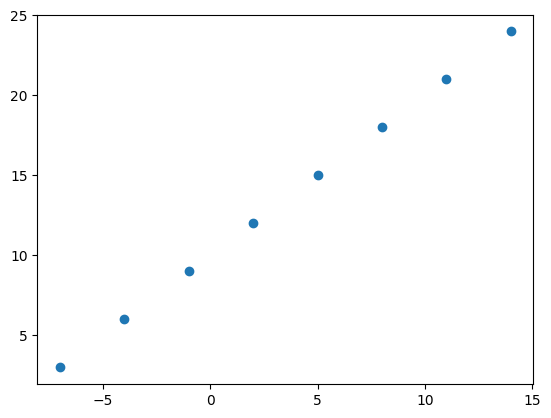

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape
# There is no shape because our X and y are scalars

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(-7.0, 3.0)

In [11]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

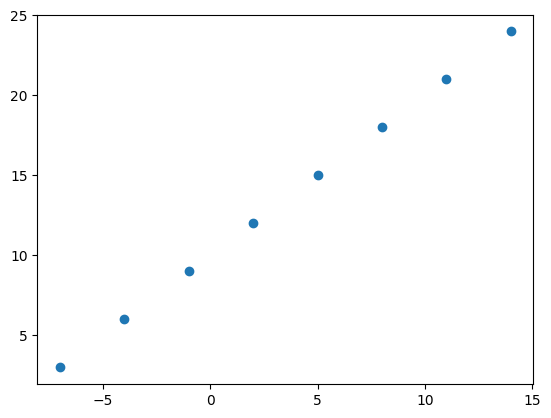

In [13]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer= tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 719ms/step - loss: 16.7313 - mae: 16.7313
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 16.4501 - mae: 16.4501
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 16.1688 - mae: 16.1688
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 15.8876 - mae: 15.8876
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 15.6063 - mae: 15.6063


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 [==============================] - 0s 227ms/step


array([[-8.3918495]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.9042 - mae: 14.9042
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 14.7717 - mae: 14.7717
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 14.6392 - mae: 14.6392
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.5067 - mae: 14.5067
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 14.3742 - mae: 14.3742
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 14.2417 - mae: 14.2417
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 14.1092 - mae: 14.1092
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9767 - mae: 13.9767
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8442 - mae: 13.8442
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 13.7117 - mae: 13.7117
Epoch 11/100
1/1 [==============================] -

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([np.array([17.0])])

1/1 [==============================] - 0s 132ms/step


array([[29.77955]], dtype=float32)

In [20]:
# Let's see if we can improve our model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.5233 - mae: 12.5233
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 12.4451 - mae: 12.4451
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 12.3668 - mae: 12.3668
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 12.2884 - mae: 12.2884
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 12.2099 - mae: 12.2099
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 12.1313 - mae: 12.1313
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 12.0526 - mae: 12.0526
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 11.9739 - mae: 11.9739
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 11.8952 - mae: 11.8952
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 11.8165 - mae: 11.8165
Epoch 11/100
1/1 [==============================] -

In [21]:
model.predict([np.array([17.0])]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 89ms/step


array([[25.648026]], dtype=float32)

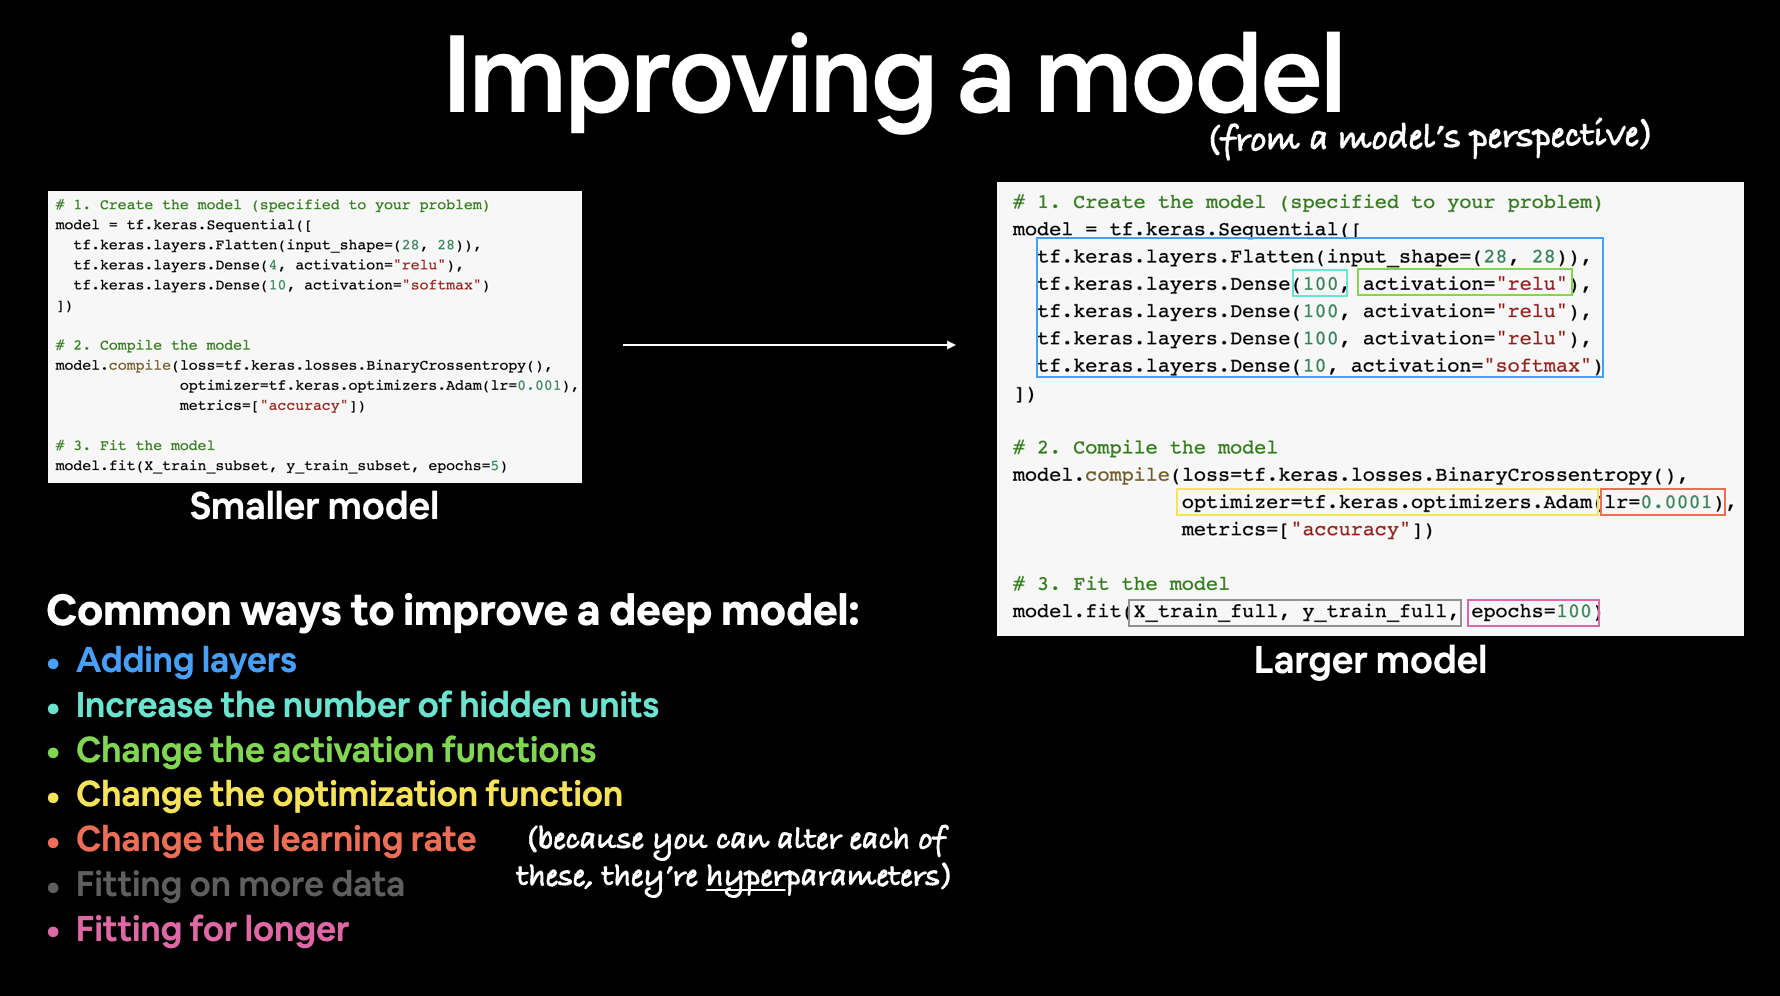

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
tweak a model -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:
>"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictins of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

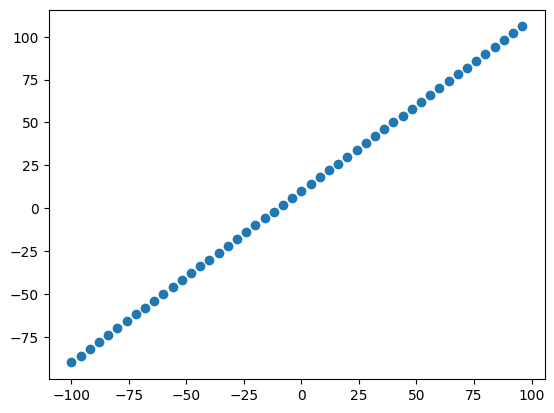

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y);

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's Visualize it again!

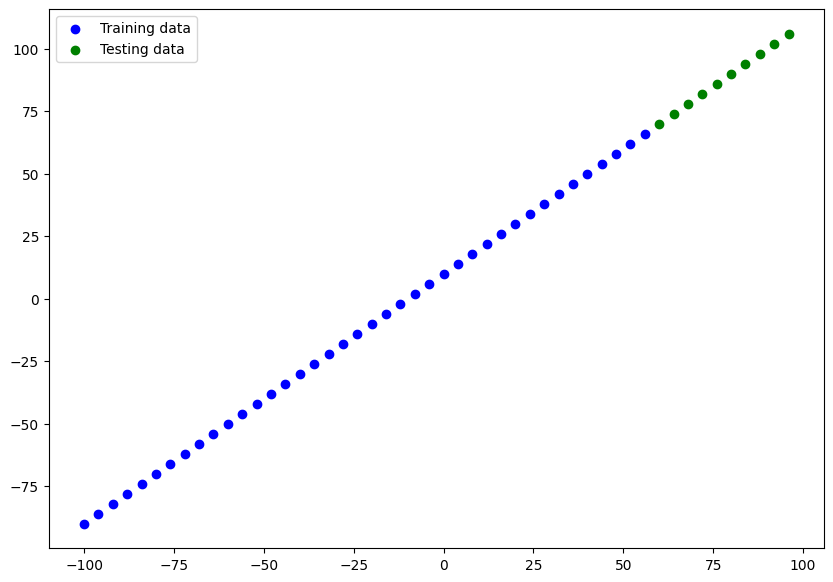

In [27]:
plt.figure(figsize=(10,7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn onf this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to able to predict this (given X, what's y?)
# Show a legend
plt.legend()

In [28]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)
# 1 . Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 .Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fit the model
#model.fit(X_train, y_train, epochs=5)


### Visualizing the model


In [29]:
#model.summary()

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number or parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

⚒ **Exercise:**Try playing around with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`.


In [32]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [33]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


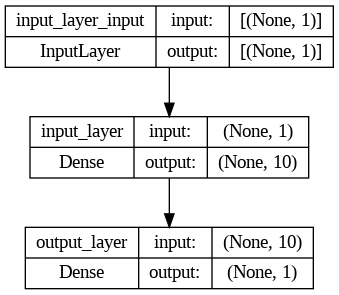

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes= True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in form of `y_test` or `y_true` versus `y_pred`(ground truth versus your model predictions).

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 166ms/step


array([[ 69.62517],
       [ 73.59253],
       [ 77.55989],
       [ 81.52725],
       [ 85.49463],
       [ 89.46199],
       [ 93.42935],
       [ 97.39671],
       [101.36409],
       [105.33145]], dtype=float32)

In [36]:
y_pred = y_pred.ravel()  # or y_pred = y_pred.squeeze()


In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

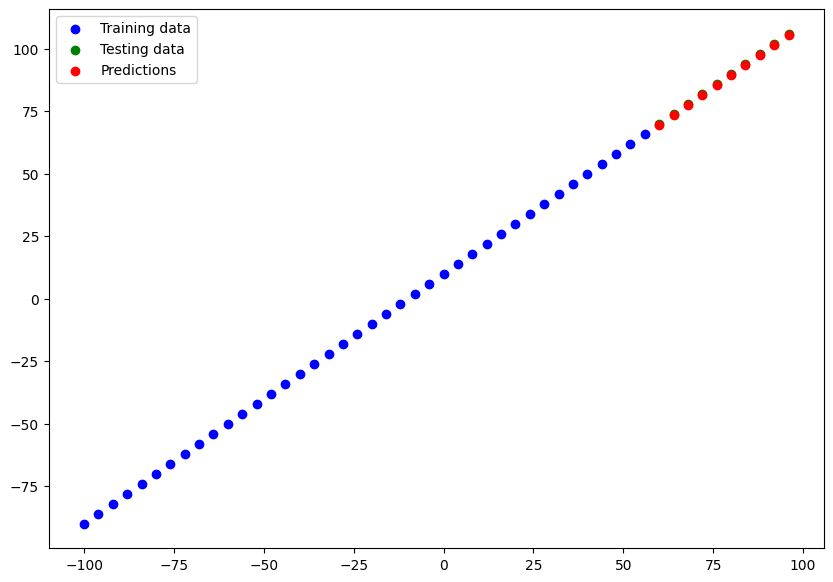

In [39]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two otf the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions" `tf.keras.lossses.MAE()`.
It is a great starter metric for any regression problem.

* MSE - mean square error, "square the average errors" `tf.keras.losses.MSE()`.
When large errors are more significant than smaller errors.

* Huber - `tf.keras.losses.Huber()`. It is a combination of MSE and MAE. Less sensitive to outliers than MSE.


In [40]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 313ms/step - loss: 0.5217 - mae: 0.5217


[0.5216919183731079, 0.5216919183731079]

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5216934>

In [42]:
y_pred

array([ 69.62517,  73.59253,  77.55989,  81.52725,  85.49463,  89.46199,
        93.42935,  97.39671, 101.36409, 105.33145], dtype=float32)

In [43]:
# Check the tensor shapes
y_test.shape, y_pred.shape

(TensorShape([10]), (10,))

In [44]:
# Shape after squeeze()
y_pred.squeeze().shape

(10,)

In [45]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5216934>

In [46]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.28095055>

In [47]:
# MAke some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to rain on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this migth come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 28ms/step - loss: 89.9020 - mae: 89.9020
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 54.4465 - mae: 54.4465
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 18.2940 - mae: 18.2940
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 10.3585 - mae: 10.3585
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 11.3838 - mae: 11.3838
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 10.5040 - mae: 10.5040
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 9.4713 - mae: 9.4713
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3324 - mae: 9.3324
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 7.5445 - mae: 7.5445
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 12.5891 - mae: 12.5891
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 48ms/step


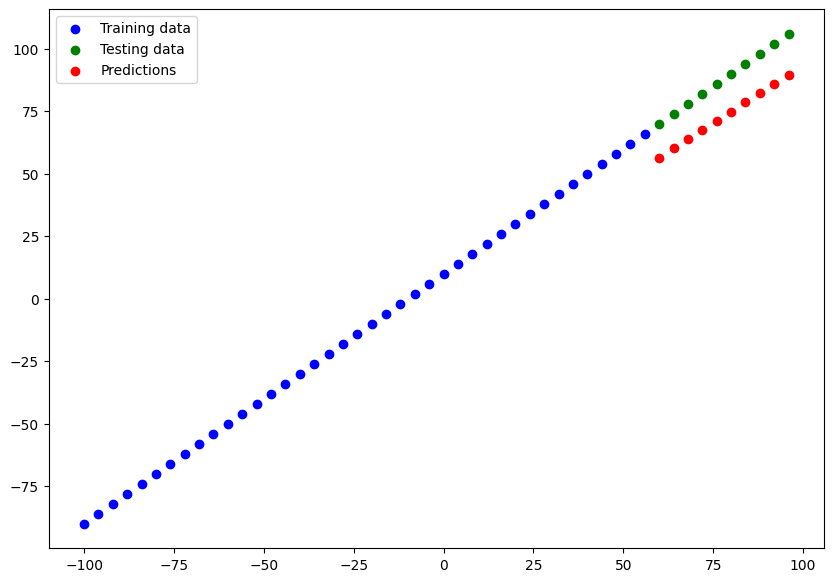

In [49]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [50]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(14.967364, 224.86678)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [51]:
tf.random.set_seed(42)
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fitting a model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 58.8915 - mae: 58.8915
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8119 - mae: 27.8119
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 20.5252 - mae: 20.5252
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.2141 - mae: 13.2141
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5975 - mae: 14.5975
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6468 - mae: 11.6468
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.7126 - mae: 12.7126
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0651 - mae: 11.0651
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.9267 - mae: 39.9267
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.3889 - mae: 27.3889
Epoch 11/100
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 89ms/step


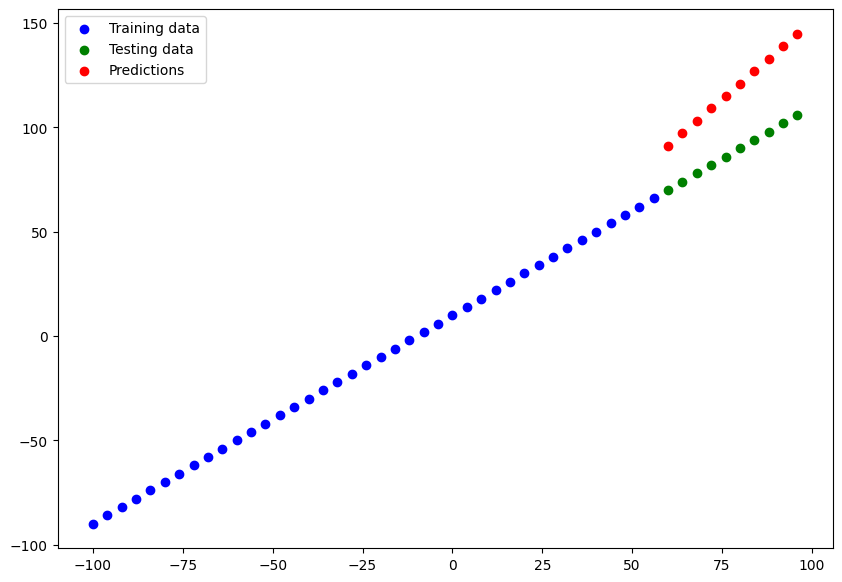

In [52]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [53]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(30.094446, 937.37756)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [54]:
# Set random seed
tf.random.set_seed(42)
# 1. Creating a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3.Fitting a model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 18ms/step - loss: 17.9562 - mae: 17.9562
Epoch 2/500
2/2 [==============================] - 0s 15ms/step - loss: 25.2438 - mae: 25.2438
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 29.1830 - mae: 29.1830
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 16.3280 - mae: 16.3280
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 18.8045 - mae: 18.8045
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 14.3269 - mae: 14.3269
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 11.5693 - mae: 11.5693
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.2608 - mae: 11.2608
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 42.3369 - mae: 42.3369
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 29.4913 - mae: 29.4913
Epoch 11/500
2/2 [==============================] -

1/1 [==============================] - 0s 55ms/step


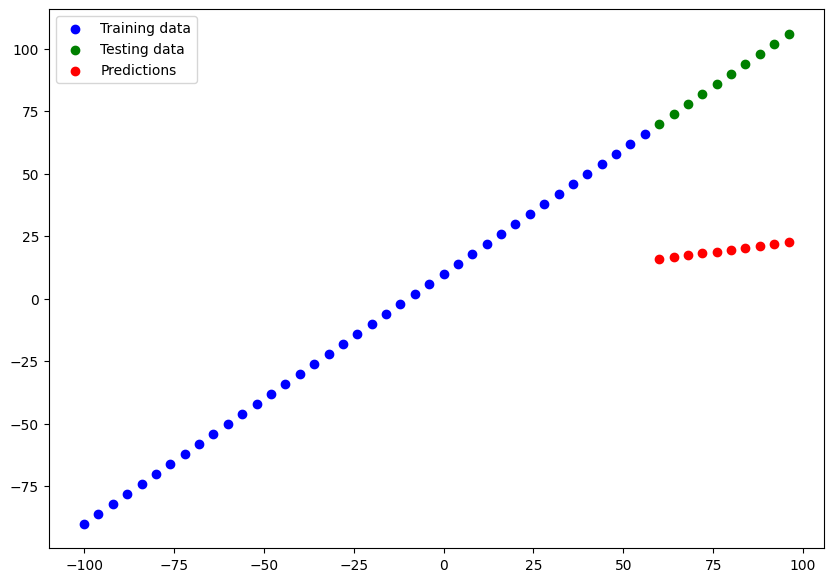

In [55]:
# Make and plot predictions for model_1
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [56]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.71329, 4807.948)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase the complexity.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [57]:
# Let's compare our model's result using a pandas DataFRane
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.967364,224.866776
1,model_2,30.094446,937.377563
2,model_3,68.713287,4807.948242


Looks like `model_2` perfomed the best...

In [58]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, they are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a toold for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).


## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such in a web application or a mobile app.

There are twon main formats we can save our model's too:
1. The SavedModel format (default)
2. The HDF5 format

In [59]:
# Save a model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [60]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [61]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Compare model_2 predictions with SavedModel format predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
# Compare the MAE of model 2 preds and loaded SavedMOdel preds
mae(y_true = y_test, y_pred=model_2_preds) == mae (y_true=y_test, y_pred =loaded_SavedModel_format_preds )

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [65]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# check to see if loaded .5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download yor files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [67]:
# Donwload a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# Save a file from Google Colab to Google Drive (requires mounting Google DRive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow

## A larger example

In [69]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [71]:
# Let's try one-hot enconde our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [72]:
# Create X & values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [73]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [74]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [75]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [76]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8720.0215 - mae: 8720.0215
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.3765 - mae: 7875.3765
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7557.2109 - mae: 7557.2109
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.1792 - mae: 7551.1792
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7767.9824 - mae: 7767.9824
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7571.0547 - mae: 7571.0547
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7571.5156 - mae: 7571.5156
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7687.5562 - mae: 7687.5562
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.4863 - mae: 7576.4863
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7714.3579 - mae: 7714.3579

In [77]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7719.6055 - mae: 7719.6055


[7719.60546875, 7719.60546875]

Right now it looks like our model isn't performir too well... let's try to improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layers with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [78]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 11918.5098 - mae: 11918.5098
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8721 - mae: 7528.8721
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7280.5518 - mae: 7280.5518
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7102.9507 - mae: 7102.9507
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6928.7905 - mae: 6928.7905
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 6727.0806 - mae: 6727.0806
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 6574.8540 - mae: 6574.8540
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 6465.8838 - mae: 6465.8838
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 6390.8687 - mae: 6390.8687
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 6305.4565 - mae: 6305.45

In [79]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3172.5400 - mae: 3172.5400


[3172.5400390625, 3172.5400390625]

In [80]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13273.4395 - mae: 13273.4395
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 13091.6523 - mae: 13091.6523
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 12735.3193 - mae: 12735.3193
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 12058.4404 - mae: 12058.4404
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 10939.6533 - mae: 10939.6533
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 9511.0586 - mae: 9511.0586
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 8183.6890 - mae: 8183.6890
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 7531.4868 - mae: 7531.4868
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7420.8149 - mae: 7420.8149
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7399.4

In [81]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13302.0107 - mae: 13302.0107
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13147.4043 - mae: 13147.4043
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12819.1768 - mae: 12819.1768
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12161.4111 - mae: 12161.4111
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11037.6357 - mae: 11037.6357
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9569.3838 - mae: 9569.3838
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8208.4590 - mae: 8208.4590
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7534.9873 - mae: 7534.9873
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7421.0601 - mae: 7421.0601
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.1206 - mae:

In [82]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4936.4233 - mae: 4936.4233


[4936.42333984375, 4936.42333984375]

In [105]:
# Evaulate 3rd model
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 15681.5576 - mae: 15681.5576


In [83]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7719.6055 - mae: 7719.6055


[7719.60546875, 7719.60546875]

In [84]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13298.1074 - mae: 13298.1074
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13121.1504 - mae: 13121.1504
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12769.2061 - mae: 12769.2061
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12089.4551 - mae: 12089.4551
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10952.7910 - mae: 10952.7910
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9487.4619 - mae: 9487.4619
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8140.4609 - mae: 8140.4609
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7502.1567 - mae: 7502.1567
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7402.5068 - mae: 7402.5068
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7382.8555 - mae:

In [85]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3495.0696 - mae: 3495.0696


[3495.069580078125, 3495.069580078125]

In [86]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7719.6055 - mae: 7719.6055


[7719.60546875, 7719.60546875]

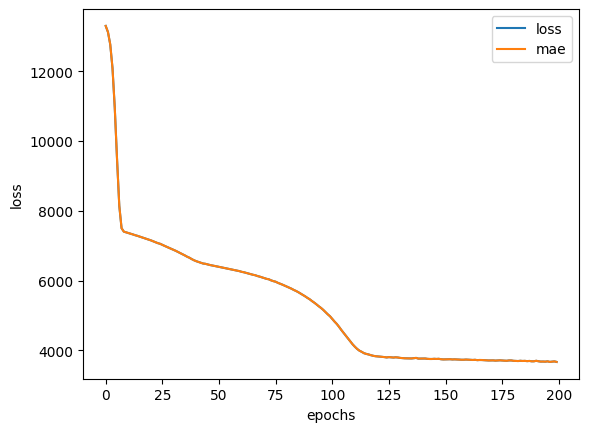

In [87]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

> 🤔 **Question:** How long should you train for?

It depends. Really it... depends on the problemn you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improve a certain metric.

In [88]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_6.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
34/34 [==============================] - 1s 2ms/step - loss: 13306.1748 - mae: 13306.1748
Epoch 2/2000
34/34 [==============================] - 0s 2ms/step - loss: 13134.6006 - mae: 13134.6006
Epoch 3/2000
34/34 [==============================] - 0s 2ms/step - loss: 12778.7129 - mae: 12778.7129
Epoch 4/2000
34/34 [==============================] - 0s 3ms/step - loss: 12080.1738 - mae: 12080.1738
Epoch 5/2000
34/34 [==============================] - 0s 2ms/step - loss: 10918.4688 - mae: 10918.4688
Epoch 6/2000
34/34 [==============================] - 0s 2ms/step - loss: 9449.4102 - mae: 9449.4102
Epoch 7/2000
34/34 [==============================] - 0s 2ms/step - loss: 8128.5215 - mae: 8128.5215
Epoch 8/2000
34/34 [==============================] - 0s 2ms/step - loss: 7518.2554 - mae: 7518.2554
Epoch 9/2000
34/34 [==============================] - 0s 3ms/step - loss: 7424.6738 - mae: 7424.6738
Epoch 10/2000
34/34 [==============================] - 0s 3ms/step - loss: 7404.8

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, yo could try both and see which performs better.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurace data frame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all the values in these columns to 0 and 1
    (OneHotEncoder (handle_unknown=  "ignore"), ["sex", "smoker", "region"])
    )

# Create X and y values
X = insurance.drop("charges", axis =1)
y = insurance["charges"]

# Create our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEnconder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


Whenever you have some sort of column transformer, you want to fit it to your training data and then use that fir column transfomert to transform your test data.

Because otherwise, if you do that separately,remember that the test data is data that the model has never seen before.  It's like taking knowledge from the future and altering the data that we have now.

In [96]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [100]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [101]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Beautiful! Our data has been normalized and one hot enconded. Now let's build a neural network model on it and see how it goes.

In [102]:
# Build a neural network model to fit on our normalized data
tf. random.set_seed(42)

# Create a model
insurance_model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model_7.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_7.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.5791 - mae: 13344.5791
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13338.0703 - mae: 13338.0703
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13320.7568 - mae: 13320.7568
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13282.3096 - mae: 13282.3096
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13211.3701 - mae: 13211.3701
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13096.7783 - mae: 13096.7783
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12928.1162 - mae: 12928.1162
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12695.1377 - mae: 12695.1377
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12387.5449 - mae: 12387.5449
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11999.27

In [103]:
# Evaulate 7th model
insurance_model_7_loss, insurance_model_7_mae = insurance_model_7.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3173.8108 - mae: 3173.8108


In [106]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_7_mae

(15681.5576171875, 3173.810791015625)